# Importing libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [76]:
%matplotlib inline

# Importing data

In [77]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\Imm_Ach 6 DA Project 6\Snow Crab Ach 6'

In [78]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\Imm_Ach 6 DA Project 6\\Snow Crab Ach 6'

In [79]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared data', 'Cleaned Snow Crab.csv'), index_col = False)

# Cleaning the data

In [80]:
df.columns

Index(['Unnamed: 0', 'id', 'latitude', 'longitude', 'year', 'name', 'sex',
       'bottom_depth', 'surface_temperature', 'bottom_temperature', 'haul',
       'catch number/square nautical mile'],
      dtype='object')

In [81]:
# Subsetting
df_cleaned = df[['id', 'latitude', 'longitude', 'year', 'name', 'sex',
       'bottom_depth', 'surface_temperature', 'bottom_temperature', 'haul',
       'catch number/square nautical mile']]

In [82]:
df_cleaned.columns

Index(['id', 'latitude', 'longitude', 'year', 'name', 'sex', 'bottom_depth',
       'surface_temperature', 'bottom_temperature', 'haul',
       'catch number/square nautical mile'],
      dtype='object')

In [83]:
df_cleaned.shape

(17924, 11)

In [84]:
df_cleaned.head()

,id,latitude,longitude,year,name,sex,bottom_depth,surface_temperature,bottom_temperature,haul,catch number/square nautical mile
0,147038,57.00000,-166.45000,1975,snow crab,male,71,9.1,1.1,117,40356.0
1,147037,57.00000,-167.08333,1975,snow crab,male,71,8.7,1.4,118,68691.0
2,147036,57.00000,-167.68333,1975,snow crab,male,75,8.8,1.6,139,119748.0
3,147035,56.66667,-172.56667,1975,snow crab,male,132,6.1,2.5,89,7882.0
4,147034,56.66667,-171.96667,1975,snow crab,male,123,5.7,2.1,90,11258.0


In [85]:
df_cleaned.dtypes

id                                     int64
latitude                             float64
longitude                            float64
year                                   int64
name                                  object
sex                                   object
bottom_depth                           int64
surface_temperature                  float64
bottom_temperature                   float64
haul                                   int64
catch number/square nautical mile    float64
dtype: object

In [86]:
# Changing the data type of 'id' to object
df_cleaned['id'] = df_cleaned['id'].astype('str')

C:\Users\thoma\AppData\Local\Temp\ipykernel_6992\178145318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['id'] = df_cleaned['id'].astype('str')


In [87]:
df_cleaned.dtypes

id                                    object
latitude                             float64
longitude                            float64
year                                   int64
name                                  object
sex                                   object
bottom_depth                           int64
surface_temperature                  float64
bottom_temperature                   float64
haul                                   int64
catch number/square nautical mile    float64
dtype: object

In [88]:
# Checking for missing values

df_cleaned.isnull().sum()

id                                   0
latitude                             0
longitude                            0
year                                 0
name                                 0
sex                                  0
bottom_depth                         0
surface_temperature                  0
bottom_temperature                   0
haul                                 0
catch number/square nautical mile    0
dtype: int64

In [89]:
# Checking for duplicates

dups = df_cleaned.duplicated().sum()

In [90]:
dups

0

In [91]:
dups.shape

()

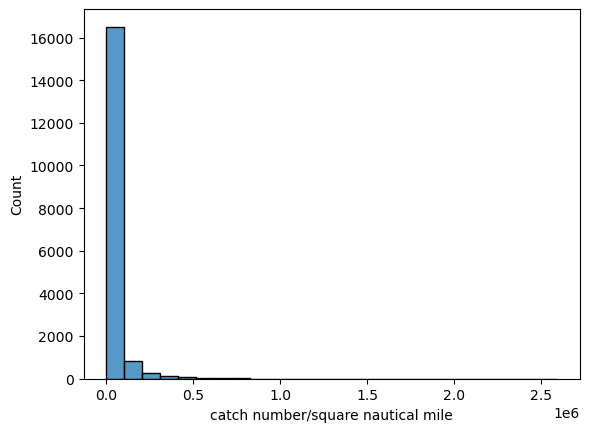

In [92]:
# Checking for extreme values

sns.histplot(df_cleaned['catch number/square nautical mile'], bins=25)

plt.show()

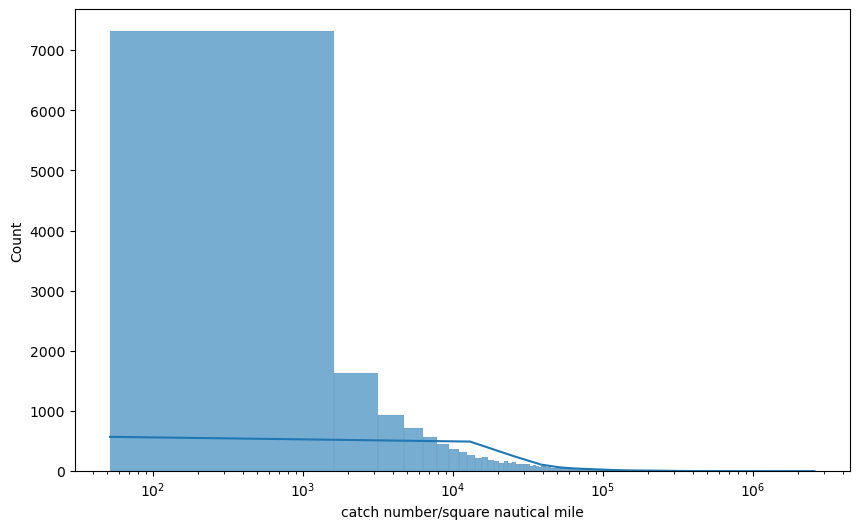

In [93]:
# Plotting on a log scale according to data spread and sample size

plt.figure(figsize=(10,6))
sns.histplot(df_cleaned['catch number/square nautical mile'], bins='fd', kde=True, edgecolor='black', alpha=0.6)
plt.xscale('log')
plt.xlabel('catch number/square nautical mile')
plt.show()

In [94]:
# Descriptive stats of catch number
df_cleaned['catch number/square nautical mile'].describe()

count    1.792400e+04
mean     3.208863e+04
std      9.789823e+04
min      5.200000e+01
25%      4.827500e+02
50%      3.214000e+03
75%      2.095875e+04
max      2.592070e+06
Name: catch number/square nautical mile, dtype: float64

In [95]:
# Removing further potential outliers

df_filtered = df_cleaned.loc[df_cleaned['catch number/square nautical mile'] <= 100000].copy()

In [96]:
df_filtered['catch number/square nautical mile'].describe()

count    16450.000000
mean     11817.496839
std      20215.873398
min         52.000000
25%        414.000000
50%       2390.000000
75%      12815.500000
max      99977.000000
Name: catch number/square nautical mile, dtype: float64

# Preparing the data

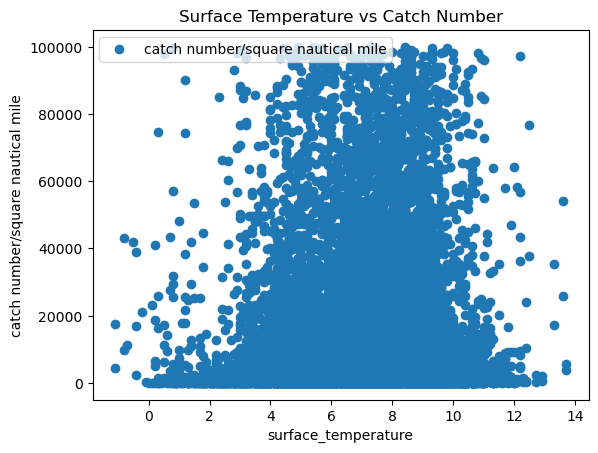

In [97]:
# Creating a scatterplot between relevant variables

g = df_filtered.plot(x = 'surface_temperature', y='catch number/square nautical mile',style='o')
plt.title('Surface Temperature vs Catch Number')  
plt.xlabel('surface_temperature')  
plt.ylabel('catch number/square nautical mile')  
plt.show()

In [98]:
g.figure
g.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Surface Temp vs Catch Number.png'))

# Null-Hypothesis: There's no increase in the catch number with increase of surface temperature.

In [99]:
# Reshaping the variables into NumPy arrays

X = df_filtered['surface_temperature'].values.reshape(-1,1)
y = df_filtered['catch number/square nautical mile'].values.reshape(-1,1)

In [100]:
# Splitting the data into two sets - training & testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [101]:
# Fitting the regression object onto the training set
# Creating the regression object
regression = LinearRegression()

In [102]:
regression.fit(X_train, y_train)

LinearRegression()

In [103]:
# Predicting the values of y using X

y_predicted = regression.predict(X_test)

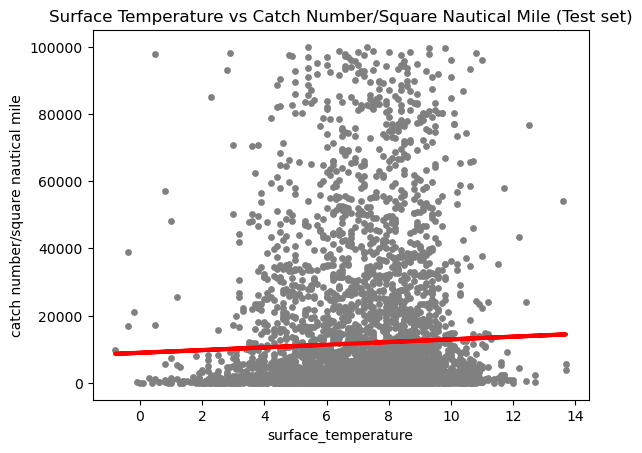

In [104]:
# Creating a plot that shows the regression line from the model on the test set

plot_test = plt
R = plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Surface Temperature vs Catch Number/Square Nautical Mile (Test set)')
plot_test.xlabel('surface_temperature')
plot_test.ylabel('catch number/square nautical mile')
plot_test.show()

In [106]:
R.figure
R.figure.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'Surface Temp Regression Line.png'))

# There's just a slight incline of the regression line and a wide spread of data/observations this linear model does not explain well. Further, beyond a surface temperature of 10 catch numbers seem to drop. Hence, other factors might also play a role and it might suit better applying multiple regression analysis to this data

In [123]:
# Creating objects for the model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [124]:
# Printing the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[399.61921683]]
Mean squared error:  421967538.9070317
R2 score:  0.0032465873601474904


# This regression line isn’t an accurate representation of the data.
# Catch number observations have a standard deviation of about 20,215, while the RMSE (square rooted MSE) is about 20,541. For an adequate interpretation of these performance metrics, the dimension of the scale of a variable and its spread of observations need to be considered in relation to its variance.
# With a R2 score closer to 0, this indicates that the model is a poor fit and doesn't explain the variance of this data well.

In [125]:
# Creating a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,4372.0,12007.895786
1,3257.0,13326.639201
2,1472.0,11208.657352
3,206.0,10888.961979
4,70.0,11288.581196
5,48548.0,12087.819629
6,6078.0,11728.162334
7,1346.0,11528.352726
8,5250.0,12847.096141
9,373.0,12407.515003


# Some of the value pairs are quite off !

# Reflections:
# 1) I am interested in this great spread of catch numbers, with a minimum of 52 and the maximum running into the millions. I would discuss this with the client and/or steakholders. I would further look into the collection method and measurement of catch numbers, if there's any bias and/or any more outliers to exclude from the data. If outliers can be confirmed, I would train and run this model on the new data set and see if this leads to better performance of the model.
# 2) As I'm expecting a multiple regression model to better explain this relationship of the variables, I'd run a multiple regression model.

In [126]:
df_filtered.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'Filtered Snow Crab.csv'))